*Mini rapport:*
    Après avoir correctement analysé et nettoyé les données, nous avons décidé de centrer notre analyse sur l'immobilier en nous focalisant surtout sur les appartements et maisons. Nous avons commenté notre code et ajouté des cellules de texte que je vous invite à lire afin de comprendre le cheminement de notre travail.
    Au niveau des difficultés rencontrées, nous avons du changer d'environement de travail. En effet, nous avions essayé d'utiliser google colab au début, mais le workflow ne nous convenait pas et les limitations matérielle devenaient trop handicapantes. Nous avons donc par la suite migré sur Vs Code. 
    Répartition du travail:
    Jules 50%
    Melchior 50%

In [ ]:
"""
!python -m pip install IPython
# get latest version of pip
!python -m pip install --upgrade pip

# for calender map
! pip install calmap


!python -m pip install geopandas
!python -m pip install squarify

!python -m pip install folium
"""
"""
!python -m pip install imageio
"""

In [ ]:
!python -m pip install geopandas

# math opeations
import math
# produce random numbers
import random

# datetime oprations
from datetime import timedelta
# for numerical analyiss
import numpy as np
# to store and process data in dataframe
import pandas as pd

# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting

%matplotlib inline
# interactive visualization
!python -m pip install plotly
import seaborn as sns
import plotly.io as pio
import plotly.offline as offline
pio.renderers.default = 'colab'
import plotly.express as px 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import geopandas as gpd
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm
import matplotlib.colors as mcolors
# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [39]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
table_valfonc = pd.read_csv(r"Path\to\valeursfoncieres-2022.txt", sep='|', header=0, names=["Identifiant de document", "Reference document", "1 Articles CGI", "2 Articles CGI", "3 Articles CGI", "4 Articles CGI", "5 Articles CGI", "No disposition", "Date mutation", "Nature mutation", "Valeur fonciere", "No voie", "B/T/Q", "Type de voie", "Code voie", "Voie", "Code postal", "Commune", "Code departement", "Code commune", "Prefixe de section", "Section", "No plan", "No Volume", "1er lot", "Surface Carrez du 1er lot", "2eme lot", "Surface Carrez du 2eme lot", "3eme lot", "Surface Carrez du 3eme lot", "4eme lot", "Surface Carrez du 4eme lot", "5eme lot", "Surface Carrez du 5eme lot", "Nombre de lots", "Code type local", "Type local", "Identifiant local", "Surface reelle bati", "Nombre pieces principales", "Nature culture", "Nature culture speciale", "Surface terrain"])


In [41]:
#on retire les lignes colonnes vide et les redondances
table_valfonc = table_valfonc.dropna(axis=1, how='all')
table_valfonc = table_valfonc.dropna(axis=0, how='all')
table_valfonc = table_valfonc.drop("No disposition", axis = 1)
table_valfonc = table_valfonc.drop("No Volume", axis = 1)
table_valfonc = table_valfonc.drop("Code type local", axis = 1)
table_valfonc = table_valfonc.drop_duplicates()


In [42]:
#suppression des lignes sans valeur foncière pour les mutation ) titre onéreux (donnée à laquelle nous allons nous intéresser)
table_valfonc = table_valfonc.dropna(subset=['Valeur fonciere','Nature mutation'])

#suppression des lignes sans information sur le type de bien
df = table_valfonc.dropna(subset=['Type local', 'Nature culture','Nature culture speciale'])

#formatage des dates
table_valfonc['Date mutation'] = pd.to_datetime(table_valfonc['Date mutation'], format='%d/%m/%Y')

#formatage des valeurs fonciere
table_valfonc['Valeur fonciere'] = table_valfonc['Valeur fonciere'].str.replace(',','.').astype(float)

#formatage des surfaces Carrez
table_valfonc['Surface Carrez du 1er lot'] = table_valfonc['Surface Carrez du 1er lot'].str.replace(',','.').astype(float)
table_valfonc['Surface Carrez du 2eme lot'] = table_valfonc['Surface Carrez du 2eme lot'].str.replace(',','.').astype(float)
table_valfonc['Surface Carrez du 3eme lot'] = table_valfonc['Surface Carrez du 3eme lot'].str.replace(',','.').astype(float)
table_valfonc['Surface Carrez du 4eme lot'] = table_valfonc['Surface Carrez du 4eme lot'].str.replace(',','.').astype(float)
table_valfonc['Surface Carrez du 5eme lot'] = table_valfonc['Surface Carrez du 5eme lot'].str.replace(',','.').astype(float)

#formatage des code de département
table_valfonc['Code departement'] = table_valfonc['Code departement'].apply(lambda x: '{0:0>2}'.format(x))


In [ ]:
# Filtrer les données pour l'année 2020
table_valfonc_2020 = pd.read_csv(r"C:\Path\to\valeursfoncieres-2020.txt", sep='|', header=0, names=["Identifiant de document", "Reference document", "1 Articles CGI", "2 Articles CGI", "3 Articles CGI", "4 Articles CGI", "5 Articles CGI", "No disposition", "Date mutation", "Nature mutation", "Valeur fonciere", "No voie", "B/T/Q", "Type de voie", "Code voie", "Voie", "Code postal", "Commune", "Code departement", "Code commune", "Prefixe de section", "Section", "No plan", "No Volume", "1er lot", "Surface Carrez du 1er lot", "2eme lot", "Surface Carrez du 2eme lot", "3eme lot", "Surface Carrez du 3eme lot", "4eme lot", "Surface Carrez du 4eme lot", "5eme lot", "Surface Carrez du 5eme lot", "Nombre de lots", "Code type local", "Type local", "Identifiant local", "Surface reelle bati", "Nombre pieces principales", "Nature culture", "Nature culture speciale", "Surface terrain"])
#on retire les lignes colonnes vide et les redondances
table_valfonc_2020 = table_valfonc_2020.dropna(axis=1, how='all')
table_valfonc_2020 = table_valfonc_2020.dropna(axis=0, how='all')
table_valfonc_2020 = table_valfonc_2020.drop("No disposition", axis = 1)
table_valfonc_2020 = table_valfonc_2020.drop("No Volume", axis = 1)
table_valfonc_2020 = table_valfonc_2020.drop("Code type local", axis = 1)
table_valfonc_2020 = table_valfonc_2020.drop_duplicates()
#suppression des lignes sans valeur foncière pour les mutation ) titre onéreux (donnée à laquelle nous allons nous intéresser)
table_valfonc_2020 = table_valfonc_2020.dropna(subset=['Valeur fonciere','Nature mutation'])

#suppression des lignes sans information sur le type de bien
df = table_valfonc_2020.dropna(subset=['Type local', 'Nature culture','Nature culture speciale'])

#formatage des dates
table_valfonc_2020['Date mutation'] = pd.to_datetime(table_valfonc_2020['Date mutation'], format='%d/%m/%Y')

#formatage des valeurs fonciere
table_valfonc_2020['Valeur fonciere'] = table_valfonc_2020['Valeur fonciere'].str.replace(',','.').astype(float)

#formatage des surfaces Carrez
table_valfonc_2020['Surface Carrez du 1er lot'] = table_valfonc_2020['Surface Carrez du 1er lot'].str.replace(',','.').astype(float)
table_valfonc_2020['Surface Carrez du 2eme lot'] = table_valfonc_2020['Surface Carrez du 2eme lot'].str.replace(',','.').astype(float)
table_valfonc_2020['Surface Carrez du 3eme lot'] = table_valfonc_2020['Surface Carrez du 3eme lot'].str.replace(',','.').astype(float)
table_valfonc_2020['Surface Carrez du 4eme lot'] = table_valfonc_2020['Surface Carrez du 4eme lot'].str.replace(',','.').astype(float)
table_valfonc_2020['Surface Carrez du 5eme lot'] = table_valfonc_2020['Surface Carrez du 5eme lot'].str.replace(',','.').astype(float)

#formatage des code de département
table_valfonc_2020['Code departement'] = table_valfonc_2020['Code departement'].apply(lambda x: '{0:0>2}'.format(x))



In [ ]:
table_valfonc_2018 = pd.read_csv(r"Path\to\valeursfoncieres-2018.txt", sep='|', header=0, names=["Identifiant de document", "Reference document", "1 Articles CGI", "2 Articles CGI", "3 Articles CGI", "4 Articles CGI", "5 Articles CGI", "No disposition", "Date mutation", "Nature mutation", "Valeur fonciere", "No voie", "B/T/Q", "Type de voie", "Code voie", "Voie", "Code postal", "Commune", "Code departement", "Code commune", "Prefixe de section", "Section", "No plan", "No Volume", "1er lot", "Surface Carrez du 1er lot", "2eme lot", "Surface Carrez du 2eme lot", "3eme lot", "Surface Carrez du 3eme lot", "4eme lot", "Surface Carrez du 4eme lot", "5eme lot", "Surface Carrez du 5eme lot", "Nombre de lots", "Code type local", "Type local", "Identifiant local", "Surface reelle bati", "Nombre pieces principales", "Nature culture", "Nature culture speciale", "Surface terrain"])
#on retire les lignes colonnes vide et les redondances
table_valfonc_2018 = table_valfonc_2018.dropna(axis=1, how='all')
table_valfonc_2018 = table_valfonc_2018.dropna(axis=0, how='all')
table_valfonc_2018 = table_valfonc_2018.drop("No disposition", axis = 1)
table_valfonc_2018 = table_valfonc_2018.drop("No Volume", axis = 1)
table_valfonc_2018 = table_valfonc_2018.drop("Code type local", axis = 1)
table_valfonc_2018 = table_valfonc_2018.drop_duplicates()
#suppression des lignes sans valeur foncière pour les mutation ) titre onéreux (donnée à laquelle nous allons nous intéresser)
table_valfonc_2018 = table_valfonc_2018.dropna(subset=['Valeur fonciere','Nature mutation'])

#suppression des lignes sans information sur le type de bien
df = table_valfonc_2018.dropna(subset=['Type local', 'Nature culture','Nature culture speciale'])

#formatage des dates
table_valfonc_2018['Date mutation'] = pd.to_datetime(table_valfonc_2018['Date mutation'], format='%d/%m/%Y')

#formatage des valeurs fonciere
table_valfonc_2018['Valeur fonciere'] = table_valfonc_2018['Valeur fonciere'].str.replace(',','.').astype(float)

#formatage des surfaces Carrez
table_valfonc_2018['Surface Carrez du 1er lot'] = table_valfonc_2018['Surface Carrez du 1er lot'].str.replace(',','.').astype(float)
table_valfonc_2018['Surface Carrez du 2eme lot'] = table_valfonc_2018['Surface Carrez du 2eme lot'].str.replace(',','.').astype(float)
table_valfonc_2018['Surface Carrez du 3eme lot'] = table_valfonc_2018['Surface Carrez du 3eme lot'].str.replace(',','.').astype(float)
table_valfonc_2018['Surface Carrez du 4eme lot'] = table_valfonc_2018['Surface Carrez du 4eme lot'].str.replace(',','.').astype(float)
table_valfonc_2018['Surface Carrez du 5eme lot'] = table_valfonc_2018['Surface Carrez du 5eme lot'].str.replace(',','.').astype(float)

#formatage des code de département
table_valfonc_2018['Code departement'] = table_valfonc_2018['Code departement'].apply(lambda x: '{0:0>2}'.format(x))


D'abord on regarde de quels types de données on dispose et comment on peut les formater et les nettoyer.

In [45]:
table_valfonc.describe(include = 'all')

,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,...,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
count,3507943,3507943,3.507943e+06,2.218318e+06,158572,2157270,3469729,3469622,3.469604e+06,3507943,...,2502.000000,7385.000000,909.000000,3.507943e+06,2022884,2.021126e+06,2.021126e+06,2279283,144145,2.279283e+06
unique,356,6,NaN,NaN,38,134,15776,422194,NaN,30655,...,NaN,NaN,NaN,NaN,4,NaN,NaN,27,124,NaN
top,2022-06-30 00:00:00,Vente,NaN,NaN,B,RUE,0040,LE VILLAGE,NaN,TOULOUSE,...,NaN,NaN,NaN,NaN,Dépendance,NaN,NaN,S,POTAG,NaN
freq,27112,3231634,NaN,NaN,93896,1218948,17062,31441,NaN,27794,...,NaN,NaN,NaN,NaN,790243,NaN,NaN,1114817,34568,NaN
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.195404e+05,6.452539e+02,NaN,NaN,NaN,NaN,5.100812e+04,NaN,...,87.601263,84.714286,93.648889,4.776916e-01,NaN,7.134343e+01,1.933785e+00,NaN,NaN,2.635551e+03
std,NaN,NaN,4.547363e+06,1.917240e+03,NaN,NaN,NaN,NaN,2.744817e+04,NaN,...,150.238415,468.667420,105.791836,8.612325e-01,NaN,5.402693e+02,2.112591e+00,NaN,NaN,1.449084e+04
min,NaN,NaN,1.000000e-02,1.000000e+00,NaN,NaN,NaN,NaN,1.000000e+03,NaN,...,1.010000,2.000000,0.800000,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00
25%,NaN,NaN,7.500000e+04,8.000000e+00,NaN,NaN,NaN,NaN,3.012900e+04,NaN,...,39.685000,7.000000,36.070000,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,2.310000e+02


Commençons notre analyse par voir ce que représentait le marcher immobilier en 2022 en France. Et quelles sont les parts des différents types de mutation



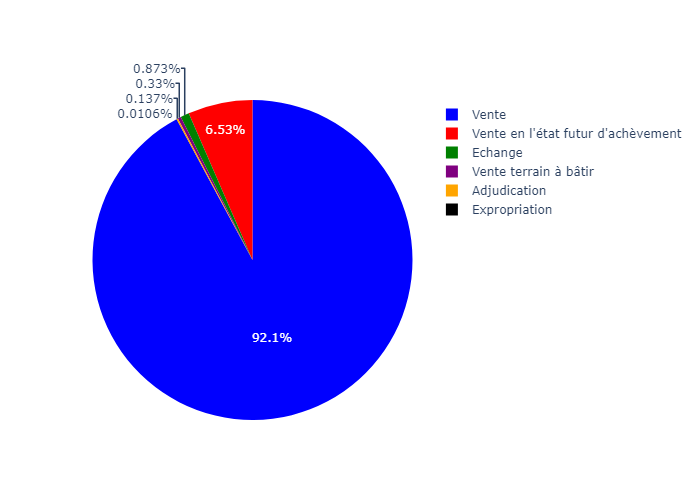

In [46]:
# Calculate the number of mutations per type
type_mutation_counts = table_valfonc['Nature mutation'].value_counts()

# Create the pie chart using Plotly graph objects
fig = go.Figure(data=go.Pie(labels=type_mutation_counts.index, values=type_mutation_counts))

# Set the colors for the pie chart
colors = ['blue', 'red', 'green', 'purple', 'orange', 'black']
fig.update_traces(marker=dict(colors=colors))

# Show the pie chart
fig.show(renderer='png')

On comprend qu'il s'agit essentiellement de ventes. Intéressons nous maintenants aux ventes

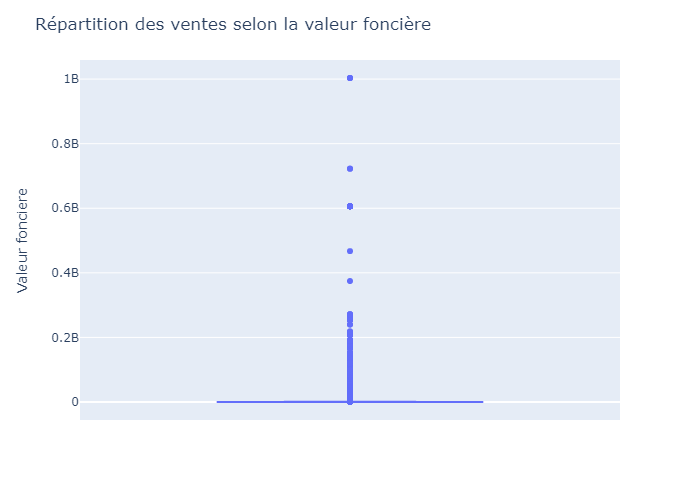

In [47]:
# Filtrer les données où la colonne "Type mutation" est égale à "Vente"
vente_data = table_valfonc[table_valfonc['Nature mutation'] == 'Vente']

# Créer la boîte à moustache avec Plotly Express
fig = px.box(vente_data, y="Valeur fonciere")
fig.update_layout(title='Répartition des ventes selon la valeur foncière')
# Afficher la boîte à moustache
fig.show(renderer = 'png')



On remarque un écart important entre la plus grande valeur observée et la mediane des valeur fonciere. Essayons de regrouper les valeurs foncière par plage et par occurence. Pour une meilleur visualisation

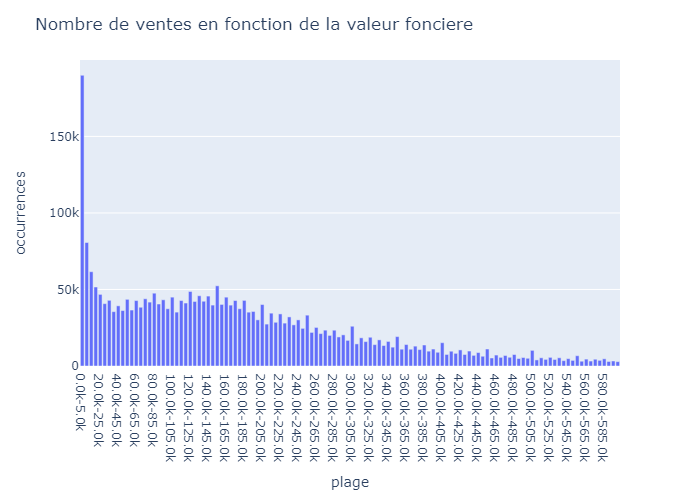

In [48]:
# Définir les plages (on s'arrête à 605000 pour une meilleur visualisation)
plages = list(range(0, 605000, 5000))
labels = [f"{plage/1000}k-{(plage+5000)/1000}k" for plage in plages[:-1]]

# Créer une copie du DataFrame
table_valfonc_copy = table_valfonc.copy()

# Appliquer les plages à la colonne des valeurs foncières avec la condition de type de mutation "Vente"
table_valfonc_copy.loc[table_valfonc_copy['Nature mutation'] == 'Vente', 'plages'] = pd.cut(table_valfonc_copy.loc[table_valfonc_copy['Nature mutation'] == 'Vente', 'Valeur fonciere'], bins=plages, labels=labels, right=False)

# Compter les occurrences dans chaque plage
occurrences = table_valfonc_copy['plages'].value_counts().sort_index().reset_index()
occurrences.columns = ['plage', 'occurrences']

# Créer le graphique à barres avec Plotly Express
fig = px.bar(occurrences, x='plage', y='occurrences')

# Ajouter un titre
fig.update_layout(title='Nombre de ventes en fonction de la valeur fonciere')

# Afficher le graphique
fig.show(renderer = 'png')

On remarque à présent que le nombre de ventes décroie lorsque le prix s'élève alors qu'on aurait peut être pu s'attendre à une répartition normale.
Regroupons à présent les ventes par type de biens.

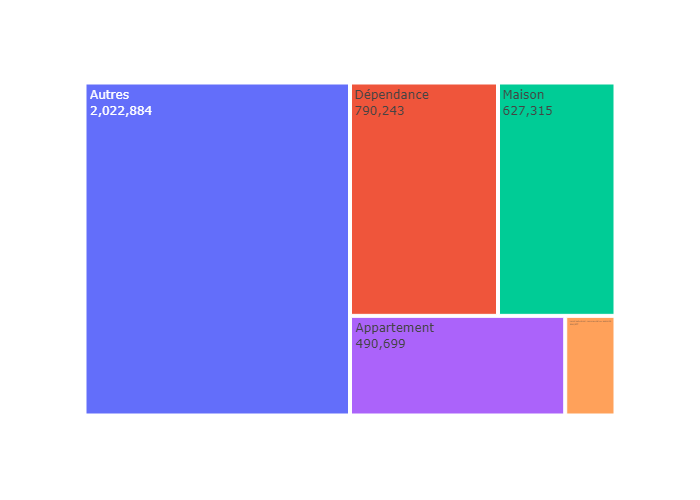

In [49]:
# Créer la variable temp en utilisant la hiérarchie de priorité
temp = table_valfonc['Type local'].fillna(table_valfonc['Nature culture']) \
    .fillna(table_valfonc['Nature culture speciale'])

# Créer une liste des catégories à exclure
categories_exclues = ['Dépendance', 'Maison', 'Appartement', 'Local industriel. commercial ou assimilé']

# Filtrer les lignes du DataFrame qui ne correspondent pas aux catégories exclues
types_locaux_regroupes = temp[temp.isin(categories_exclues)]

# Effectuer le regroupement par nombre d'occurrences des types de locaux regroupés
occurrences = types_locaux_regroupes.value_counts().reset_index()

# Renommer les colonnes
occurrences.columns = ['Type local', 'Occurrences']
# Créer un DataFrame pour la catégorie 'Autres'
autres_occurrences = pd.DataFrame({'Type local': ['Autres'], 'Occurrences': [temp.isin(categories_exclues).sum()]})

# Concaténer les DataFrames des occurrences et de 'Autres'
occurrences = pd.concat([occurrences, autres_occurrences])

# Créer le treemap avec Plotly Express
fig = px.treemap(occurrences, path=["Type local"], values='Occurrences')

# Mettre à jour les légendes
fig.data[0].textinfo = 'label+text+value'

# Afficher le treemap avec les légendes
fig.show(renderer = 'png')

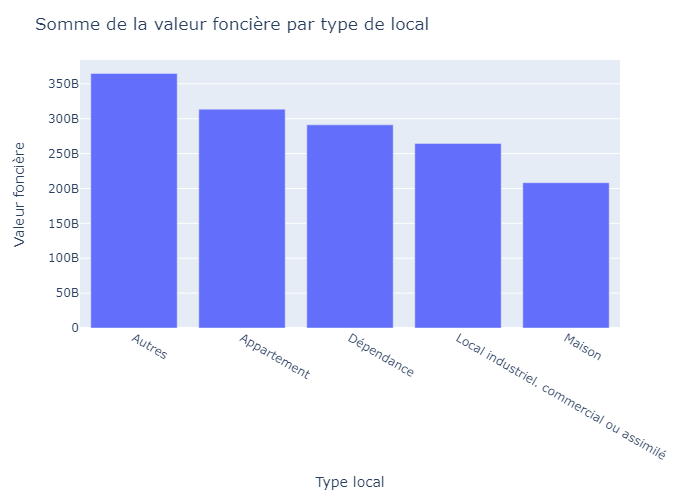

In [50]:
# Créer une copie du DataFrame table_valfonc pour effectuer les manipulations
df = table_valfonc.copy()

# Créer la variable temp en utilisant la hiérarchie de priorité
temp = df['Type local'].fillna(df['Nature culture']).fillna(df['Nature culture speciale'])

# Créer une liste des catégories à exclure
categories_exclues = ['Dépendance', 'Maison', 'Appartement', 'Local industriel. commercial ou assimilé']

# Filtrer les lignes du DataFrame qui ne correspondent pas aux catégories exclues
types_locaux_regroupes = temp[temp.isin(categories_exclues)]

# Filtrer les lignes du DataFrame par type de mutation "Vente"
df = df[df['Nature mutation'] == 'Vente']

# Grouper par type local et calculer la somme de la valeur foncière
grouped_data = df.groupby('Type local')['Valeur fonciere'].sum().reset_index()

# Créer un DataFrame pour la catégorie 'Autres'
autres_occurrences = pd.DataFrame({'Type local': ['Autres'], 'Valeur fonciere': [df[~temp.isin(categories_exclues)]['Valeur fonciere'].sum()]})

# Concaténer les DataFrames des occurrences et de 'Autres'
grouped_data = pd.concat([grouped_data, autres_occurrences])

# Trier les données par valeur foncière de manière décroissante
grouped_data = grouped_data.sort_values('Valeur fonciere', ascending=False)

# Créer le bar chart avec Plotly Express
fig = px.bar(grouped_data, x='Type local', y='Valeur fonciere', orientation='v')

# Mettre à jour les labels et les titres
fig.update_layout(title='Somme de la valeur foncière par type de local', xaxis_title='Type local', yaxis_title='Valeur foncière')

# Afficher le bar chart
fig.show(renderer = 'png')


On remarque que la plupart des ventes s'effectuent sur des biens qualifés dans autres.
Interessons nous maintenant au logement.

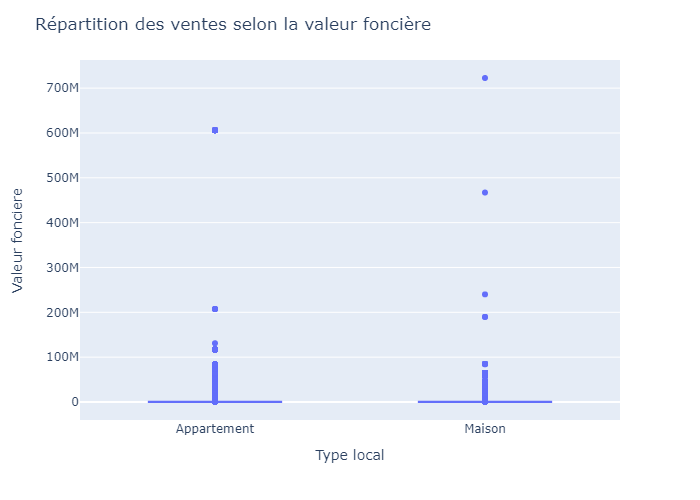

In [51]:
# Filtrer les données où la colonne "Type local" est égale à "Appartement" ou "Maison"
vente_data = table_valfonc[(table_valfonc['Nature mutation'] == 'Vente') & ((table_valfonc['Type local'] == 'Appartement') | (table_valfonc['Type local'] == 'Maison'))]

# Créer la boîte à moustaches avec Plotly Express
fig = px.box(vente_data, x="Type local", y="Valeur fonciere")

# Ajouter un titre
fig.update_layout(title='Répartition des ventes selon la valeur foncière')

# Afficher la boîte à moustaches
fig.show(renderer = 'png')

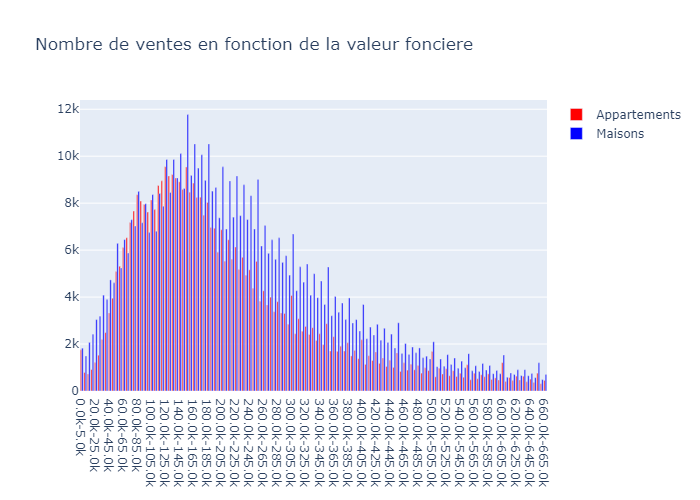

In [52]:
vente_data = table_valfonc[(table_valfonc['Nature mutation'] == 'Vente') & ((table_valfonc['Type local'] == 'Appartement') | (table_valfonc['Type local'] == 'Maison'))]

# Définir les plages (on s'arrête à 1000000 pour une meilleure visualisation)
plages = list(range(0, 670000, 5000))
labels = [f"{plage/1000}k-{(plage+5000)/1000}k" for plage in plages[:-1]]

# Appliquer les plages à la colonne des valeurs foncières
vente_data['plages'] = pd.cut(vente_data['Valeur fonciere'], bins=plages, labels=labels, right=False)

# Compter les occurrences dans chaque plage pour les appartements
occurrences_appartements = vente_data.loc[vente_data['Type local'] == 'Appartement', 'plages'].value_counts().sort_index().reset_index()
occurrences_appartements.columns = ['plage', 'occurrences_appartements']

# Compter les occurrences dans chaque plage pour les maisons
occurrences_maisons = vente_data.loc[vente_data['Type local'] == 'Maison', 'plages'].value_counts().sort_index().reset_index()
occurrences_maisons.columns = ['plage', 'occurrences_maisons']

# Fusionner les données d'appartements et de maisons
occurrences = pd.merge(occurrences_appartements, occurrences_maisons, on='plage', how='outer').fillna(0)

# Créer le graphique à barres avec Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=occurrences['plage'], y=occurrences['occurrences_appartements'], name='Appartements', marker_color='red'))
fig.add_trace(go.Bar(x=occurrences['plage'], y=occurrences['occurrences_maisons'], name='Maisons', marker_color='blue'))

# Ajouter un titre
fig.update_layout(title='Nombre de ventes en fonction de la valeur fonciere')
fig.show(renderer = 'png')



On peut remarquer une tendance se dessiner pour les achats d'appartements et de maison. Il semble que les valeurs foncière tourne autour de 150k € et sa distribution est assez proche d'une loi normale. Essayons de voir si on peut trouver une relation entre le prix et la surface du bien.

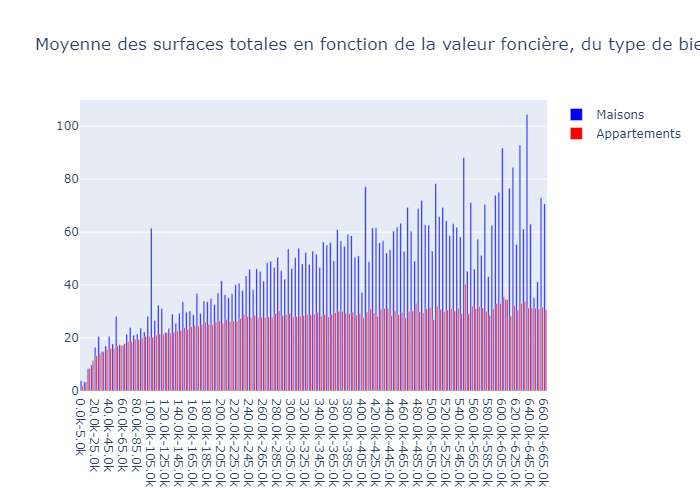

In [53]:
# Filtrer les données de vente pour les types de bien "Appartement" ou "Maison"
vente_data = table_valfonc[(table_valfonc['Nature mutation'] == 'Vente') & ((table_valfonc['Type local'] == 'Appartement') | (table_valfonc['Type local'] == 'Maison'))]

# Définir les plages (on s'arrête à 1000000 pour une meilleure visualisation)
plages = list(range(0, 670000, 5000))
labels = [f"{plage/1000}k-{(plage+5000)/1000}k" for plage in plages[:-1]]

# Appliquer les plages à la colonne des valeurs foncières
vente_data['plages'] = pd.cut(vente_data['Valeur fonciere'], bins=plages, labels=labels, right=False)

# Calculer la somme des surfaces totales pour chaque donnée en fonction de la plage de prix
vente_data['Surface Carrez Total'] = vente_data[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].sum(axis=1)

# Calculer le nombre total de lots pour chaque plage de prix et type de bien
vente_data['Nombre de lots total'] = vente_data.groupby(['plages', 'Type local'])['Nombre de lots'].transform('sum')

# Calculer la somme des surfaces Carrez totales pour chaque plage de prix et type de bien
vente_data['Somme des surfaces Carrez'] = vente_data.groupby(['plages', 'Type local'])['Surface Carrez Total'].transform('sum')

# Calculer la moyenne des surfaces totales en fonction de la plage de prix, du type de bien et du nombre de lots
vente_data['Moyenne des surfaces Carrez'] = vente_data['Somme des surfaces Carrez'] / vente_data['Nombre de lots total']

# Sélectionner les colonnes pertinentes pour le graphique
moyennes = vente_data[['plages', 'Type local', 'Moyenne des surfaces Carrez']].drop_duplicates()

# Créer le graphique à barres pour les maisons et les appartements
fig = go.Figure()

# Ajouter les barres pour les maisons
maisons = moyennes[moyennes['Type local'] == 'Maison']
fig.add_trace(go.Bar(x=maisons['plages'], y=maisons['Moyenne des surfaces Carrez'], name='Maisons', marker_color='blue'))

# Ajouter les barres pour les appartements
appartements = moyennes[moyennes['Type local'] == 'Appartement']
fig.add_trace(go.Bar(x=appartements['plages'], y=appartements['Moyenne des surfaces Carrez'], name='Appartements', marker_color='red'))

# Tri des données des abscisses
maisons = maisons.sort_values('plages')
appartements = appartements.sort_values('plages')

# Mise en forme du graphique
fig.update_layout(
    title='Moyenne des surfaces totales en fonction de la valeur foncière, du type de bien et du nombre de lots',
    xaxis={'categoryorder': 'array', 'categoryarray': maisons['plages']}
)

# Afficher le graphique
fig.show(renderer = 'png')


Pour un même prix les maisons on tendances à être plus grandes que les appartements. De plus la surface des appartement augmente très peu devant la valeur foncière en comparaison avec les maisons.
Nous pouvons maintenant nous intéresser au nombre de ventes par département pour évaluer le dynamisme du marché.

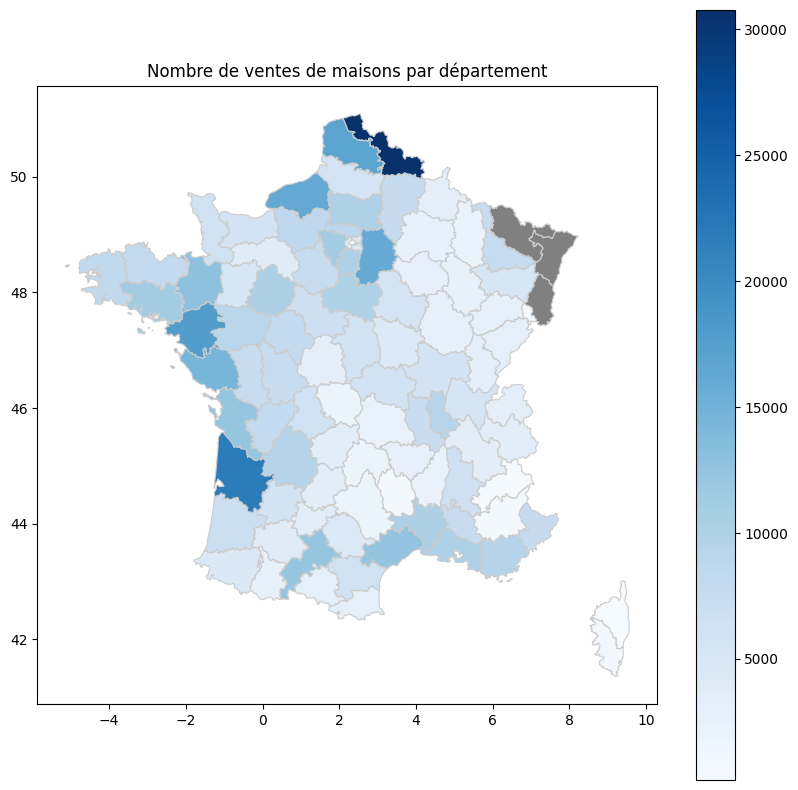

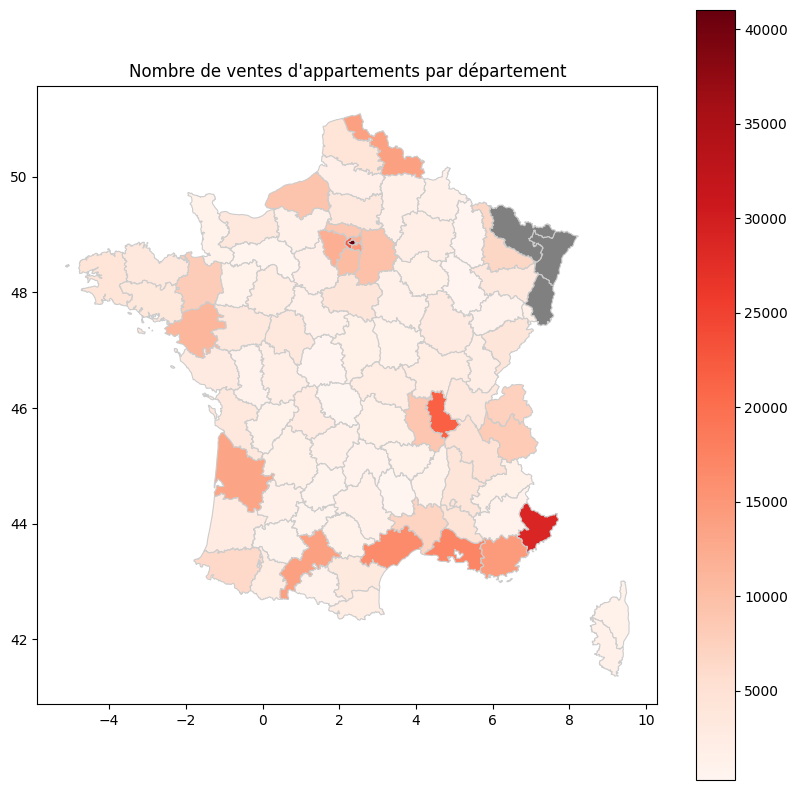

In [54]:

# Charger le fichier GeoJSON des départements français
url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
departments = gpd.read_file(url)

# Filtrer les données pour les types de bien 'Maison' et 'Appartement'
data = table_valfonc[table_valfonc['Type local'].isin(['Maison', 'Appartement'])]

# Calculer le nombre total de ventes de maisons par département
ventes_maisons = data[data['Type local'] == 'Maison'].groupby('Code departement').size().reset_index(name='Ventes Maisons')

# Calculer le nombre total de ventes d'appartements par département
ventes_appartements = data[data['Type local'] == 'Appartement'].groupby('Code departement').size().reset_index(name='Ventes Appartements')

# Fusionner les données géospatiales avec les données de ventes par département pour les maisons
departments_ventes_maisons = departments.merge(ventes_maisons, left_on='code', right_on='Code departement', how='left')

# Fusionner les données géospatiales avec les données de ventes par département pour les appartements
departments_ventes_appartements = departments.merge(ventes_appartements, left_on='code', right_on='Code departement', how='left')

# Créer la carte des ventes de maisons par département
fig, ax = plt.subplots(figsize=(10, 10))
departments_ventes_maisons.plot(column='Ventes Maisons', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'grey'})
ax.set_title("Nombre de ventes de maisons par département")
plt.show()

# Créer la carte des ventes d'appartements par département
fig, ax = plt.subplots(figsize=(10, 10))
departments_ventes_appartements.plot(column='Ventes Appartements', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'grey'})
ax.set_title("Nombre de ventes d'appartements par département")
plt.show()


On remarque un tropisme vers les littoraux, les grandes villes, et les frontières belges et suisses. Essayons de voir ce que chaque département représente dans le marché en regardant la valeur foncière cumulée.

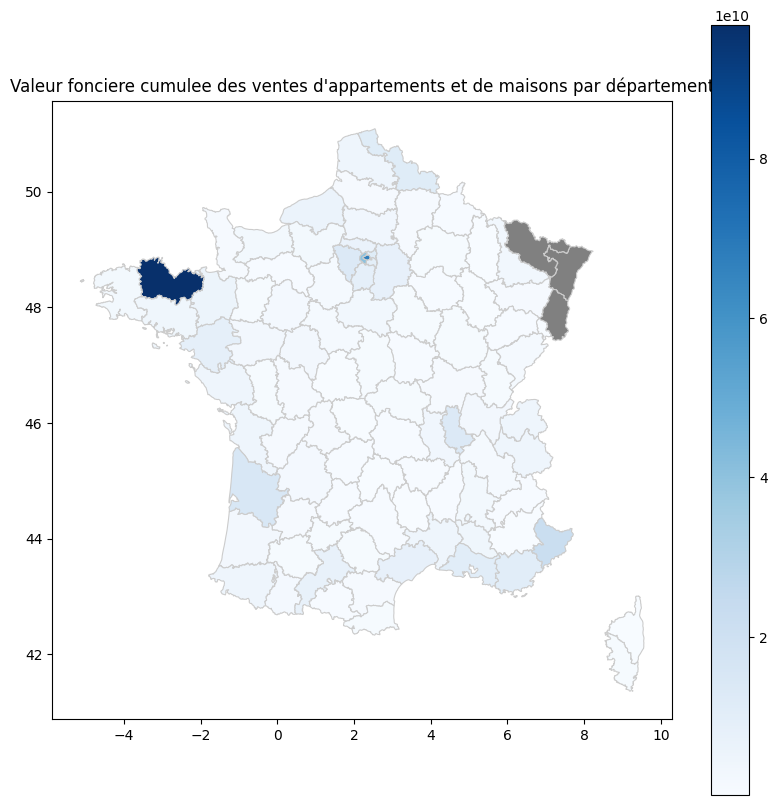

In [55]:
# Charger le fichier GeoJSON des départements français
url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
departments = gpd.read_file(url)

# Filtrer les données pour les types de bien 'Maison' et 'Appartement'
data = table_valfonc[table_valfonc['Type local'].isin(['Maison', 'Appartement'])]

# Calculer la valeur foncière cumulée des ventes par département
ventes_par_departement = data.groupby('Code departement')['Valeur fonciere'].sum().reset_index(name='Valeur fonciere cumulee')

# Convertir le code département en format de chaîne de caractères
ventes_par_departement['Code departement'] = ventes_par_departement['Code departement'].astype(str)

# Fusionner les données géospatiales avec les données de ventes par département
departments_ventes = departments.merge(ventes_par_departement, left_on='code', right_on='Code departement', how='left')


# Créer la carte des ventes d'appartements et de maisons par département
fig, ax = plt.subplots(figsize=(10, 10))
departments_ventes.plot(column='Valeur fonciere cumulee', cmap="Blues", linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'grey'})
ax.set_title("Valeur fonciere cumulee des ventes d'appartements et de maisons par département")
plt.show()


Cette carte nous montre donc les sommes mises en jeu dans chaque départemnts. On peut voir que en Ile-de-France la valeur foncière total mise en jeu est très haute alors que etonnament dans les départements des autres grandes villes pas tant que ça. De même il y a aussi la surprise du département de Côtes-d'armor qui à atteint une valeur foncière totale énorme.

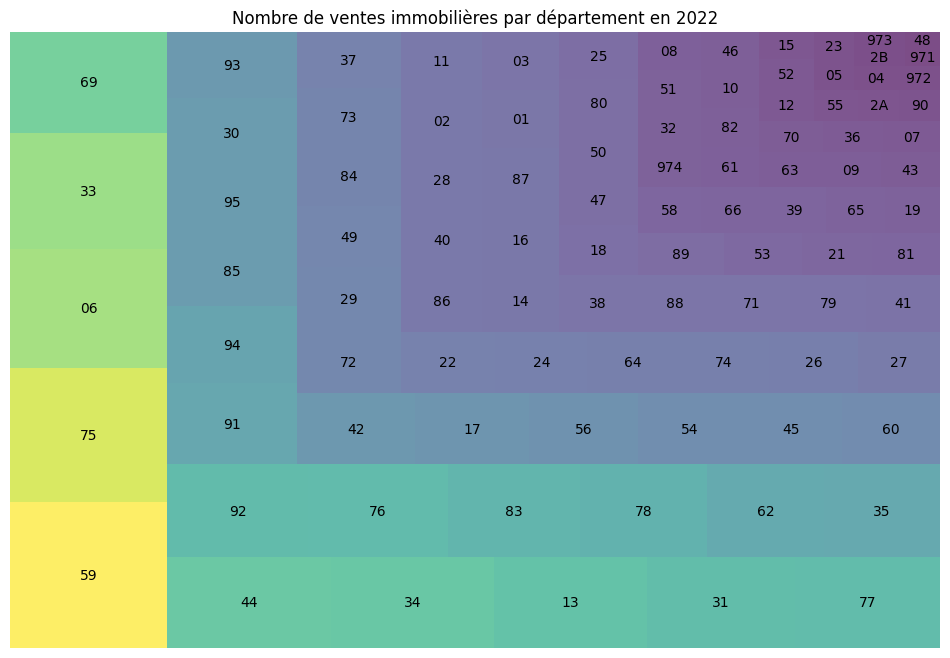

In [56]:
# Filtrer les transactions sur les maisons et appartements
maisons_appartements = table_valfonc[(table_valfonc['Type local'] == 'Maison') | (table_valfonc['Type local'] == 'Appartement')]

# Compter le nombre de transactions par département pour 2022
transactions_per_region = maisons_appartements['Code departement'].value_counts().reset_index()
transactions_per_region.columns = ['Region', 'Transactions']

# Créer une colormap
norm = plt.Normalize(transactions_per_region['Transactions'].min(), transactions_per_region['Transactions'].max())
colors = [cm.viridis(norm(value)) for value in transactions_per_region['Transactions']]

# Créer le treemap
plt.figure(figsize=(12,8))
squarify.plot(sizes=transactions_per_region['Transactions'], label=transactions_per_region['Region'], color=colors, alpha=0.7)
plt.axis('off')
plt.title('Nombre de ventes immobilières par département en 2022')
plt.show()


Ce treemap  montre le nombre de transaction faite dans chaques departements et nous permet donc de connaître les régions ayant le plus de mouvement immobilier en 2022: le 59 qui est le Nord et le 75 qui correspond à Paris. Au contraire les departements ayant le moins de mouvement immobilier en 2022 qui sont logiquement les departements outre-mers et la corse. Nous pouvons ensuite nous demander quels sont les departements ayant la mediane la plus haute et la plus faible.

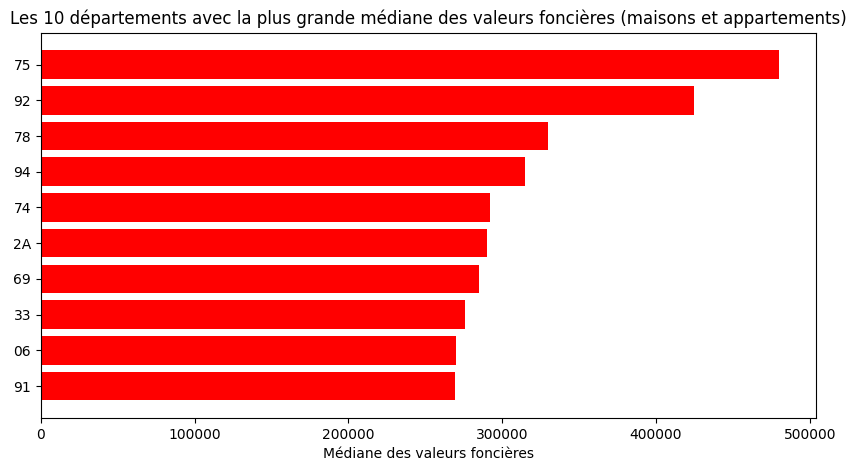

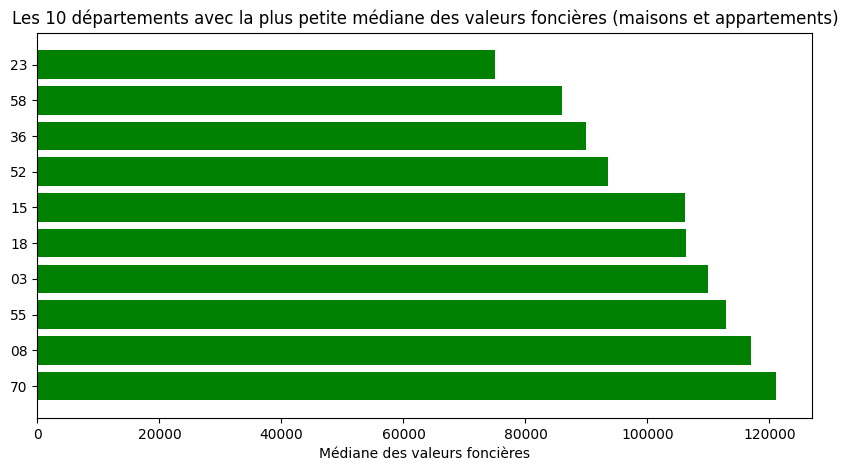

In [57]:
# Filtrer les transactions sur les maisons et appartements
maisons_appartements = table_valfonc[(table_valfonc['Type local'] == 'Maison') | (table_valfonc['Type local'] == 'Appartement')]

# Calculer la médiane des valeurs foncières par département
median_values = maisons_appartements.groupby('Code departement')['Valeur fonciere'].median().reset_index()

# Trier les données par médiane décroissante
top_10_expensive = median_values.nlargest(10, 'Valeur fonciere')
top_10_cheapest = median_values.nsmallest(10, 'Valeur fonciere')

# Créer un graphique à barres pour les départements les plus chers
plt.figure(figsize=(10, 5))
plt.barh(top_10_expensive['Code departement'][::-1], top_10_expensive['Valeur fonciere'][::-1], color='red')
plt.xlabel('Médiane des valeurs foncières')
plt.title('Les 10 départements avec la plus grande médiane des valeurs foncières (maisons et appartements)')
plt.show()

# Créer un graphique à barres pour les départements les moins chers
plt.figure(figsize=(10, 5))
plt.barh(top_10_cheapest['Code departement'][::-1], top_10_cheapest['Valeur fonciere'][::-1], color='green')
plt.xlabel('Médiane des valeurs foncières')
plt.title('Les 10 départements avec la plus petite médiane des valeurs foncières (maisons et appartements)')
plt.show()


Le faite d'utiliser la médiane dans ces classements est plus cohérents que la moyenne car les moyennes sont trop facilement fossé par des biens qui vont se vendre tres chere. Ceci nous montre logiquement que les départements les plus chères se retrouvent tous en Ile-de-France.

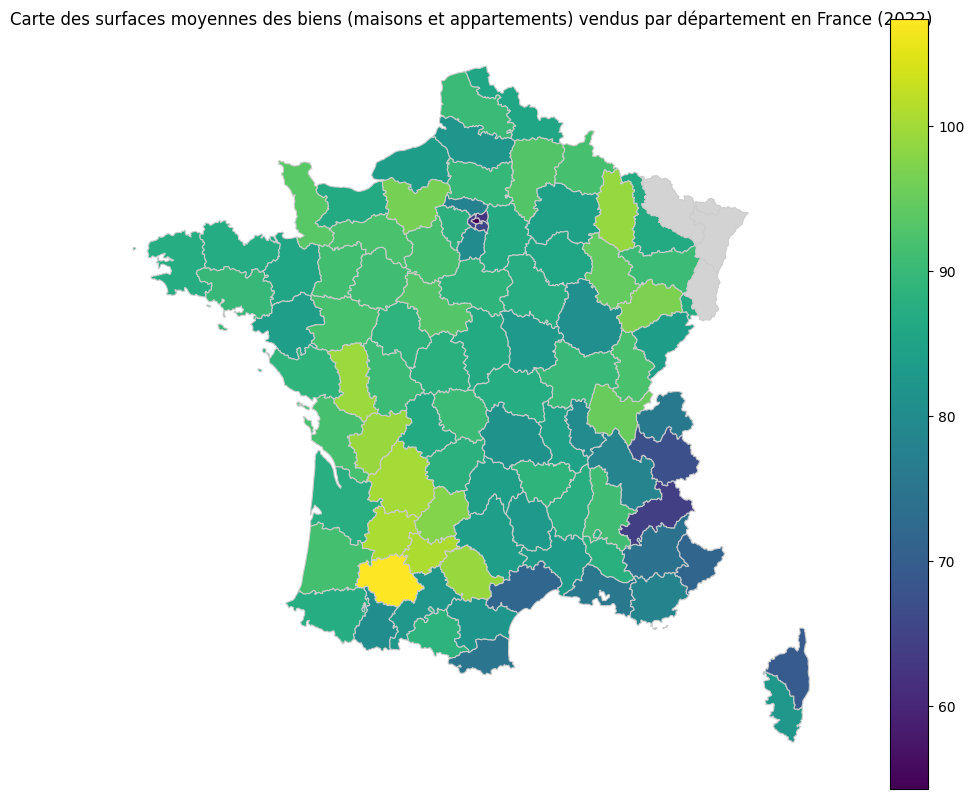

In [58]:

# Charger le fichier GeoJSON des départements français
url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"
departments = gpd.read_file(url)

# Filtrer les données pour l'année 2022 et les transactions sur les maisons et appartements
transactions_2022 = table_valfonc[(table_valfonc['Date mutation'].dt.year == 2022) & ((table_valfonc['Type local'] == 'Maison') | (table_valfonc['Type local'] == 'Appartement'))]

# Calculer la surface moyenne des biens vendus pour chaque département
mean_surface = transactions_2022.groupby('Code departement')['Surface reelle bati'].mean().reset_index()

# Fusionner les données géospatiales et les données sur les surfaces moyennes
departments = departments.merge(mean_surface, left_on='code', right_on='Code departement', how='left')

# Créer la carte des surfaces moyennes des biens vendus par département
fig, ax = plt.subplots(1, figsize=(12, 10))
departments.plot(column='Surface reelle bati', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'lightgrey'})
ax.axis('off')
ax.set_title('Carte des surfaces moyennes des biens (maisons et appartements) vendus par département en France (2022)')
plt.show()



Avec cette carte on constate bien que les biens achetés en métropole sont en moyenne plus petit que ceux achetés en campagne. Nous allons maitenant regarder la même carte mais sur la valeur foncière total mise en jeu dans chaque département pour pouvoir comparer.

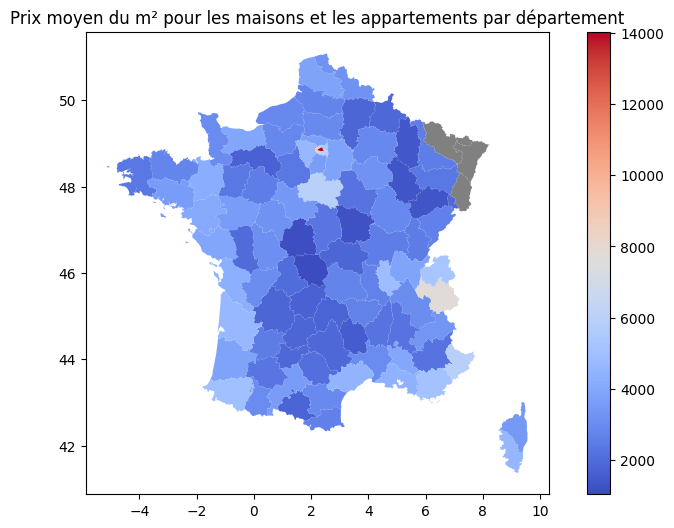

In [59]:

# Charger le fichier GeoJSON des départements français
url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
departments = gpd.read_file(url)

# Filtrer les données pour les maisons et les appartements
houses_and_apartments = table_valfonc[table_valfonc['Type local'].isin(['Maison', 'Appartement'])]

# Convertir la colonne 'Surface Carrez du 1er lot' en numérique
houses_and_apartments['Surface Carrez du 1er lot'] = pd.to_numeric(houses_and_apartments['Surface Carrez du 1er lot'], errors='coerce')

# Convertir la colonne 'Valeur fonciere' en numérique
houses_and_apartments['Valeur fonciere'] = pd.to_numeric(houses_and_apartments['Valeur fonciere'], errors='coerce')

# Créer une nouvelle colonne pour le prix par mètre carré
houses_and_apartments['Prix m2'] = houses_and_apartments['Valeur fonciere'] / houses_and_apartments['Surface Carrez du 1er lot']

# Calculer le prix moyen du mètre carré par département
mean_price_per_m2 = houses_and_apartments.groupby('Code departement')['Prix m2'].mean().reset_index()

# Fusionner les données géospatiales et les données sur les prix moyens
departments = departments.merge(mean_price_per_m2, left_on='code', right_on='Code departement', how='left')

# Créer la carte des prix moyens du mètre carré pour les maisons et les appartements par département
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
departments.plot(column='Prix m2', ax=ax, legend=True, cmap='coolwarm',missing_kwds={'color': 'grey'})
plt.title('Prix moyen du m² pour les maisons et les appartements par département')
plt.show()


Finalement après avoir fait les deux cartes précédentes nous étions obligés de faire la carte du prix du m2 dans chaque département où il n'y a pas de surprise avec Paris et le 92 qui ont un prix moyen très élevé. On peut se demander pourquoi ce n'est pas le cas pour les régions des autres grandes villes comme Marseille ou Lyon. Une explication possible est que le reste de leurs du departements vient contre-balancé leur prix élevé.

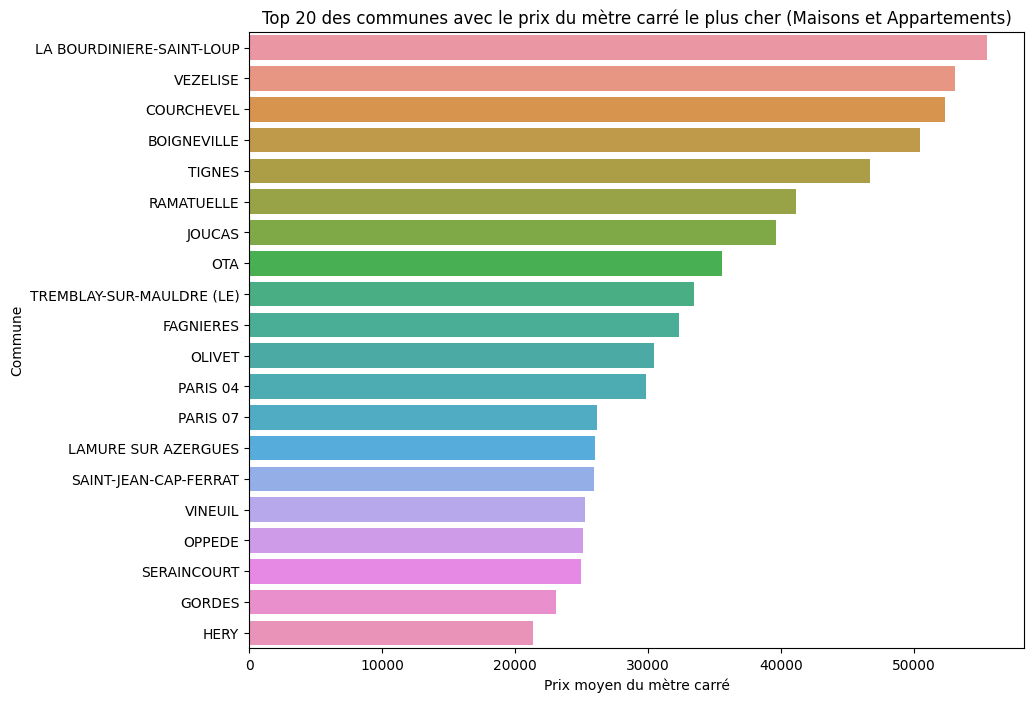

In [60]:

#Filtrer les transactions pour inclure uniquement les maisons et les appartements
maisons_appartements = table_valfonc[(table_valfonc['Type local'] == 'Maison') | (table_valfonc['Type local'] == 'Appartement')]

#Calculer le prix du mètre carré pour chaque transaction
maisons_appartements['Prix m2'] = maisons_appartements['Valeur fonciere'] / maisons_appartements['Surface Carrez du 1er lot']

#Grouper par commune et calculer le prix moyen du mètre carré
prix_m2_par_commune = maisons_appartements.groupby('Commune')['Prix m2'].mean().reset_index()

#Trier par prix moyen du mètre carré, en ordre décroissant, et prendre les 20 premières communes
top_20_communes = prix_m2_par_commune.sort_values('Prix m2', ascending=False).head(20)

#Créer le graphique
plt.figure(figsize=(10,8))
sns.barplot(y='Commune', x='Prix m2', data=top_20_communes)
plt.xlabel('Prix moyen du mètre carré')
plt.ylabel('Commune')
plt.title('Top 20 des communes avec le prix du mètre carré le plus cher (Maisons et Appartements)')
plt.show()

Nous avons trouvé interessant de faire un classement des communes ayant le prix du m2 carré le plus haut. Le classement est dominé par des villes des Alpes où bon nombre de chalet y sont vendus très chère, . Mais sinon on retrouve bien évidemment des arrondissements de Paris.

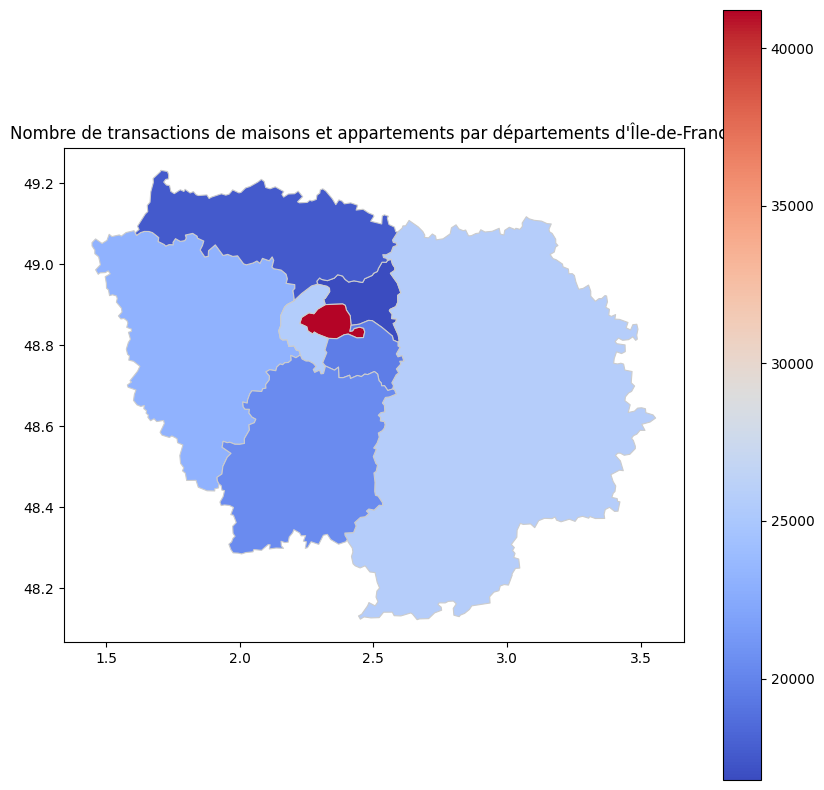

In [61]:

#Filtrer les transactions pour inclure uniquement les maisons et les appartements
maisons_appartements = table_valfonc[(table_valfonc['Type local'] == 'Maison') | (table_valfonc['Type local'] == 'Appartement')]

#Filtrer les données pour l'Île-de-France (codes départementaux 75, 77, 78, 91, 92, 93, 94, 95)
ile_de_france_data = maisons_appartements[maisons_appartements['Code departement'].isin(['75', '77', '78', '91', '92', '93', '94', '95'])]

#Compter le nombre de transactions par département
idf_transaction_counts = ile_de_france_data['Code departement'].value_counts().reset_index()
idf_transaction_counts.columns = ['Departement', 'Transactions']

#Charger le fichier GeoJSON des départements de l'Île-de-France
url = "https://france-geojson.gregoiredavid.fr/repo/regions/ile-de-france/departements-ile-de-france.geojson"
idf_map = gpd.read_file(url)

#Fusionner les données de transaction avec le GeoDataFrame
idf_map = idf_map.merge(idf_transaction_counts, left_on='code', right_on='Departement', how='left')

#Remplacer les valeurs NaN par 0 (dans le cas où il n'y a pas de transactions pour certains départements)
idf_map['Transactions'].fillna(0, inplace=True)

#Créer la carte
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
idf_map.plot(column='Transactions', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Nombre de transactions de maisons et appartements par départements d\'Île-de-France')
plt.show()


Nous voulions ensuite faire une petit zoom sur l'ile de france pour voir un peu les departements au sein même de celle-ci qui ont une forte attractivité (visible de part le  nombre de transaction dans chaque départements). Paris domine évidement suivi par le 92.

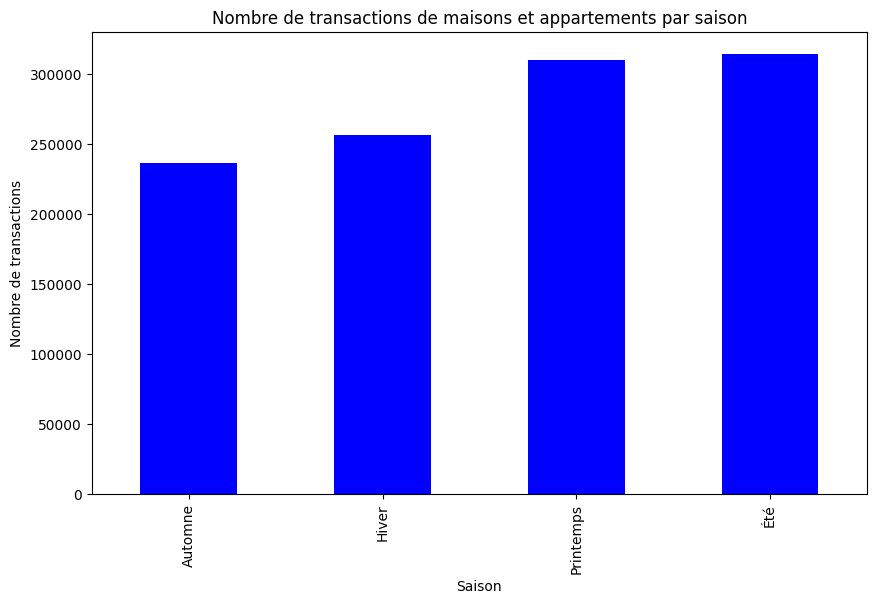

In [62]:
#Filtrer les transactions pour inclure uniquement les maisons et les appartements
maisons_appartements = table_valfonc[(table_valfonc['Type local'] == 'Maison') | (table_valfonc['Type local'] == 'Appartement')]

#Convertir la colonne de la date en date
maisons_appartements['Date mutation'] = pd.to_datetime(maisons_appartements['Date mutation'])

#Fonction pour obtenir la saison à partir du mois
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Printemps'
    elif month >= 6 and month <= 8:
        return 'Été'
    elif month >= 9 and month <= 11:
        return 'Automne'
    else:
        return 'Hiver'

#Ajouter la colonne de la saison
maisons_appartements['Saison'] = maisons_appartements['Date mutation'].dt.month.apply(get_season)

#Compter le nombre de transactions par saison
transactions_per_saison = maisons_appartements['Saison'].value_counts()

#Créer le diagramme en bâtons
plt.figure(figsize=(10,6))
transactions_per_saison.sort_index().plot(kind='bar', color='blue')
plt.xlabel('Saison')
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions de maisons et appartements par saison')
plt.show()

Nous nous sommes aussi demandé si les saisons jouaient sur le nombre de transactions. Les différences entre les saisons ne sont pas très flagrantes ont peu néanmoins constater que les saisons automone et hiver ont moins de transactions réalisées durant leurs pèriodes. Un lien possible est qu'en Automne et en hiver l'année a recommencé et donc les personnes ont plus peur de s'engager sachant qu'ils ont besoin de stabilité en début d'année.On va vérifier ça en comparant aux autres années.

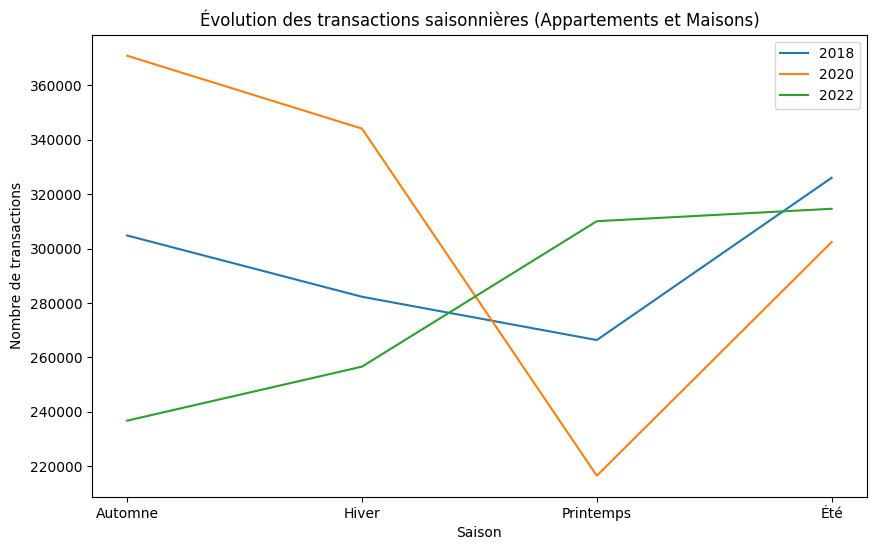

In [63]:
# Filtrer les données pour les appartements et maisons
data_2018 = table_valfonc_2018[(table_valfonc_2018['Type local'] == 'Appartement') | (table_valfonc_2018['Type local'] == 'Maison')]
data_2020 = table_valfonc_2020[(table_valfonc_2020['Type local'] == 'Appartement') | (table_valfonc_2020['Type local'] == 'Maison')]
data_2022 = table_valfonc[(table_valfonc['Type local'] == 'Appartement') | (table_valfonc['Type local'] == 'Maison')]

# Fonction pour obtenir la saison à partir du mois
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Printemps'
    elif month >= 6 and month <= 8:
        return 'Été'
    elif month >= 9 and month <= 11:
        return 'Automne'
    else:
        return 'Hiver'

# Ajouter la colonne de la saison pour chaque année
data_2018['Saison'] = data_2018['Date mutation'].dt.month.apply(get_season)
data_2020['Saison'] = data_2020['Date mutation'].dt.month.apply(get_season)
data_2022['Saison'] = data_2022['Date mutation'].dt.month.apply(get_season)

# Compter le nombre de transactions par saison pour chaque année
transactions_per_season_2018 = data_2018['Saison'].value_counts().sort_index()
transactions_per_season_2020 = data_2020['Saison'].value_counts().sort_index()
transactions_per_season_2022 = data_2022['Saison'].value_counts().sort_index()

# Créer le graphique en ligne pour l'évolution des transactions saisonnières
plt.figure(figsize=(10,6))
plt.plot(transactions_per_season_2018.index, transactions_per_season_2018.values, label='2018')
plt.plot(transactions_per_season_2020.index, transactions_per_season_2020.values, label='2020')
plt.plot(transactions_per_season_2022.index, transactions_per_season_2022.values, label='2022')

# Ajouter des labels et un titre
plt.xlabel('Saison')
plt.ylabel('Nombre de transactions')
plt.title('Évolution des transactions saisonnières (Appartements et Maisons)')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

Avec cette comparaison entre les 3 différentes années on se rend compte que l'explication que nous avions donnée n'est pas valable pour les autres années et qu'il est difficile d'établir un lien entre les saisons et les achats de biens dans la société.

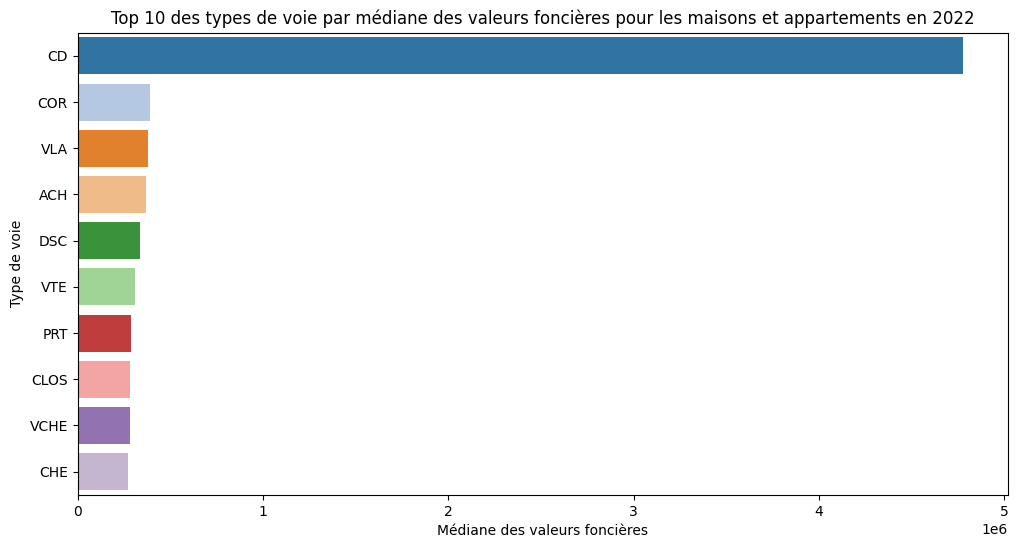

In [64]:

# Filtrer les transactions pour inclure uniquement les maisons et les appartements
maisons_appartements = table_valfonc[(table_valfonc['Type local'] == 'Maison') | (table_valfonc['Type local'] == 'Appartement')]

# Filtrer les données pour l'année 2022
maisons_appartements_2022 = maisons_appartements[maisons_appartements['Date mutation'].dt.year == 2022]

# Calculer le nombre de transactions pour chaque type de voie
transaction_counts = maisons_appartements_2022['Type de voie'].value_counts()

# Obtenir seulement les types de voie avec un nombre de transactions supérieur à un certain seuil
threshold = 20
large_transaction_types = transaction_counts[transaction_counts > threshold].index

# Filtrer le DataFrame pour seulement ces types de voie
maisons_appartements_2022_large = maisons_appartements_2022[maisons_appartements_2022['Type de voie'].isin(large_transaction_types)]

# Calculer la médiane pour chaque type de voie
median_values = maisons_appartements_2022_large.groupby('Type de voie')['Valeur fonciere'].median().reset_index()

# Trier les données par médiane décroissante
median_values = median_values.sort_values('Valeur fonciere', ascending=False)

# Sélectionner uniquement les 10 premiers types de voie avec les médianes les plus élevées
top_10 = median_values.head(10)

# Créer un graphique à barres avec des couleurs différentes pour chaque barre
plt.figure(figsize=(12, 6))
sns.barplot(x='Valeur fonciere', y='Type de voie', data=top_10, palette='tab20')
plt.xlabel('Médiane des valeurs foncières')
plt.ylabel('Type de voie')
plt.title('Top 10 des types de voie par médiane des valeurs foncières pour les maisons et appartements en 2022')

plt.show()

On peut voir que les types de voies où la médiane des biens vendus de cette voies sont les plus chères sont les Chemins de loin puis les cours,villas,avenue,descente

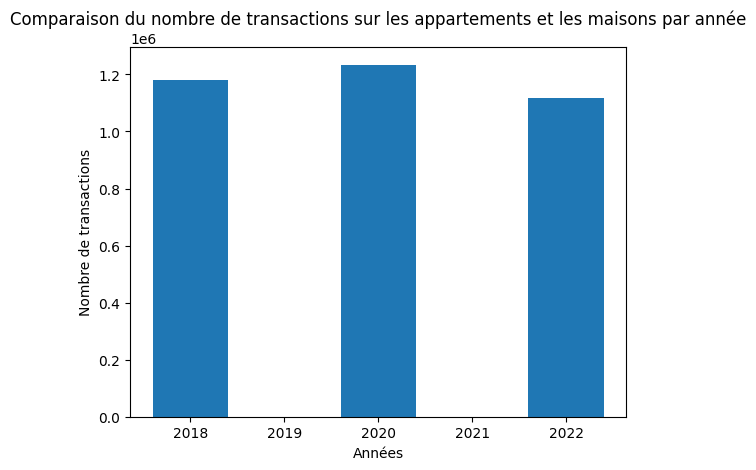

In [65]:

# Filtrer les données pour les transactions sur les appartements et les maisons
appart_maison_2018 = table_valfonc_2018[table_valfonc_2018['Type local'].isin(['Appartement', 'Maison'])]
appart_maison_2020 = table_valfonc_2020[table_valfonc_2020['Type local'].isin(['Appartement', 'Maison'])]
appart_maison_2022 = table_valfonc[table_valfonc['Type local'].isin(['Appartement', 'Maison'])]

# Nombre de transactions pour chaque année
transaction_counts = [appart_maison_2018.shape[0], appart_maison_2020.shape[0], appart_maison_2022.shape[0]]

# Années correspondantes
years = [2018, 2020, 2022]

# Création du diagramme en bâtons
plt.bar(years, transaction_counts)

# Ajout des labels et titre
plt.xlabel('Années')
plt.ylabel('Nombre de transactions')
plt.title('Comparaison du nombre de transactions sur les appartements et les maisons par année')

# Affichage du diagramme
plt.show()


On constate avec ce graphe que le Covid n'a pas enormément influencé le marché immobilier. En effet celui-ci à même fait augmenter le nombre de transactions, cela peut sans dout s'éxpliquer par le faite que à cause du covid beaucoup de magasin, restaurant,... on du mettre la clé sous la porte ce qui à rajouté bon nombre de transactions.

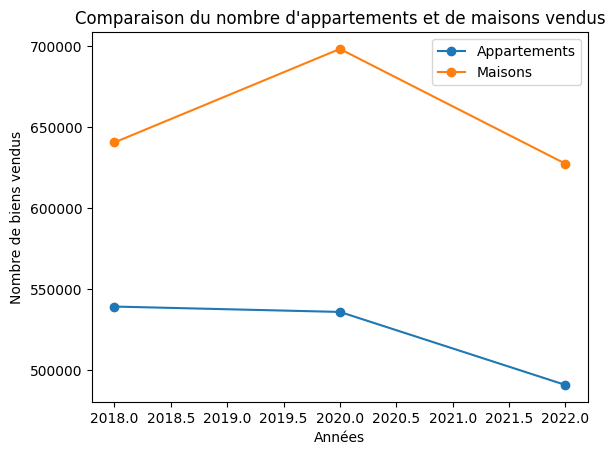

In [66]:
# Filtrer les données par type de bien (appartement ou maison)
appartements_2018 = table_valfonc_2018[table_valfonc_2018['Type local'] == 'Appartement']
appartements_2020 = table_valfonc_2020[table_valfonc_2020['Type local'] == 'Appartement']
appartements_2022 = table_valfonc[table_valfonc['Type local'] == 'Appartement']

maisons_2018 = table_valfonc_2018[table_valfonc_2018['Type local'] == 'Maison']
maisons_2020 = table_valfonc_2020[table_valfonc_2020['Type local'] == 'Maison']
maisons_2022 = table_valfonc[table_valfonc['Type local'] == 'Maison']

# Nombre d'appartements et de maisons pour chaque année
appartements_counts = [appartements_2018.shape[0], appartements_2020.shape[0], appartements_2022.shape[0]]
maisons_counts = [maisons_2018.shape[0], maisons_2020.shape[0], maisons_2022.shape[0]]

# Années correspondantes
years = [2018, 2020, 2022]

# Création du graphique
plt.plot(years, appartements_counts, marker='o', label='Appartements')
plt.plot(years, maisons_counts, marker='o', label='Maisons')

# Ajout des labels, titre et légende
plt.xlabel('Années')
plt.ylabel('Nombre de biens vendus')
plt.title('Comparaison du nombre d\'appartements et de maisons vendus')
plt.legend()

# Affichage du graphique
plt.show()


On remarque que durant la pèriode du covid moins d'appartements ont été vendu contrairement au maisons avec sans doute comme raison que étant donné l'isolement les gens voulaient peut être des domicile plus grand.

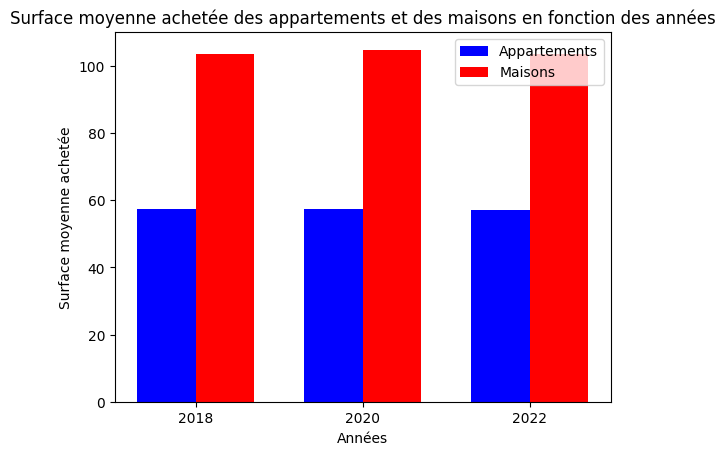

In [67]:

# Calcul de la surface moyenne achetée pour les appartements en 2018, 2020 et 2022
surface_achetee_2018_appartement = table_valfonc_2018[table_valfonc_2018['Type local'] == 'Appartement']['Surface reelle bati'].mean()
surface_achetee_2020_appartement = table_valfonc_2020[table_valfonc_2020['Type local'] == 'Appartement']['Surface reelle bati'].mean()
surface_achetee_2022_appartement = table_valfonc[table_valfonc['Type local'] == 'Appartement']['Surface reelle bati'].mean()

# Calcul de la surface moyenne achetée pour les maisons en 2018, 2020 et 2022
surface_achetee_2018_maison = table_valfonc_2018[table_valfonc_2018['Type local'] == 'Maison']['Surface reelle bati'].mean()
surface_achetee_2020_maison = table_valfonc_2020[table_valfonc_2020['Type local'] == 'Maison']['Surface reelle bati'].mean()
surface_achetee_2022_maison = table_valfonc[table_valfonc['Type local'] == 'Maison']['Surface reelle bati'].mean()

# Création des listes de données pour les appartements et les maisons
years = [2018, 2020, 2022]
bar_width = 0.35  # Largeur des barres
bar_positions_appartement = np.arange(len(years))
bar_positions_maison = bar_positions_appartement + bar_width

surface_moyenne_appartement = [surface_achetee_2018_appartement, surface_achetee_2020_appartement, surface_achetee_2022_appartement]
surface_moyenne_maison = [surface_achetee_2018_maison, surface_achetee_2020_maison, surface_achetee_2022_maison]

# Création du diagramme à barres pour les appartements
plt.bar(bar_positions_appartement, surface_moyenne_appartement, label='Appartements', color='blue', width=bar_width)

# Création du diagramme à barres pour les maisons
plt.bar(bar_positions_maison, surface_moyenne_maison, label='Maisons', color='red', width=bar_width)

# Configuration des axes
plt.xticks(bar_positions_appartement + bar_width / 2, years)
plt.xlabel('Années')
plt.ylabel('Surface moyenne achetée')
plt.title('Surface moyenne achetée des appartements et des maisons en fonction des années')

# Affichage de la légende
plt.legend()

# Affichage du diagramme
plt.show()


On remarque que la suface moyenne acheté au file des années reste constante alors qu'en raison du covid les gens auraient pu trouver leur domicile trop petit a force d'y rester et vouloir plus grand.

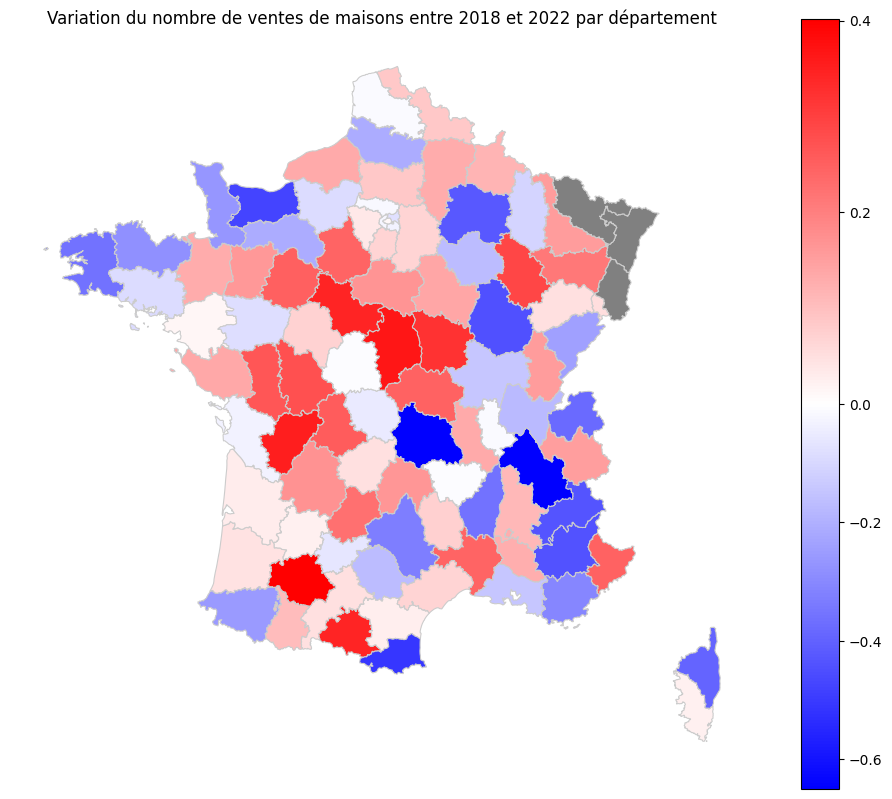

In [68]:
# Filtrer les données pour les maisons uniquement
table_valfonc_2018_maison = table_valfonc_2018[table_valfonc_2018['Type local'] == 'Maison']
table_valfonc_2022_maison = table_valfonc[table_valfonc['Type local'] == 'Maison']

# Compter le nombre de ventes de maisons par département pour 2018 et 2022
ventes_2018_maison = table_valfonc_2018_maison['Code departement'].value_counts().reset_index()
ventes_2022_maison = table_valfonc_2022_maison['Code departement'].value_counts().reset_index()

# Renommer les colonnes
ventes_2018_maison.columns = ['Departement', 'Ventes 2018']
ventes_2022_maison.columns = ['Departement', 'Ventes 2022']

# Fusionner les données
ventes_diff_maison = ventes_2022_maison.merge(ventes_2018_maison, on='Departement', how='left')

# Calculer le pourcentage de variation
ventes_diff_maison['Variation'] = (ventes_diff_maison['Ventes 2022'] - ventes_diff_maison['Ventes 2018']) / ventes_diff_maison['Ventes 2018']

# Charger le fichier GeoJSON des départements français
url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
departments = gpd.read_file(url)

# Fusionner les données géospatiales et les données sur la variation des ventes
departments = departments.merge(ventes_diff_maison, left_on='code', right_on='Departement', how='left')


# Définir les valeurs minimales et maximales de variation
min_variation = ventes_diff_maison['Variation'].min()
max_variation = ventes_diff_maison['Variation'].max()

# Définir la colormap personnalisée
cmap = mcolors.LinearSegmentedColormap.from_list('variation_cmap', ['#0000FF', '#FFFFFF', '#FF0000'])

# Définir les bornes de la variation pour la colormap
norm = mcolors.TwoSlopeNorm(vmin=min_variation, vcenter=0, vmax=max_variation)

# Créer la carte de la variation des ventes d'appartements
fig, ax = plt.subplots(1, figsize=(12, 10))
departments.plot(column='Variation', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm,missing_kwds={'color': 'grey'})
ax.axis('off')
ax.set_title("Variation du nombre de ventes de maisons entre 2018 et 2022 par département")

plt.show()


On remarque que dans la plus part de la France le covid a pour effet de pousser les gens à vouloir acheter des maisons comme le montre ce graphe. Nous allons ensuite faire la même chose pour savoir si il en va de même pour les appartements.

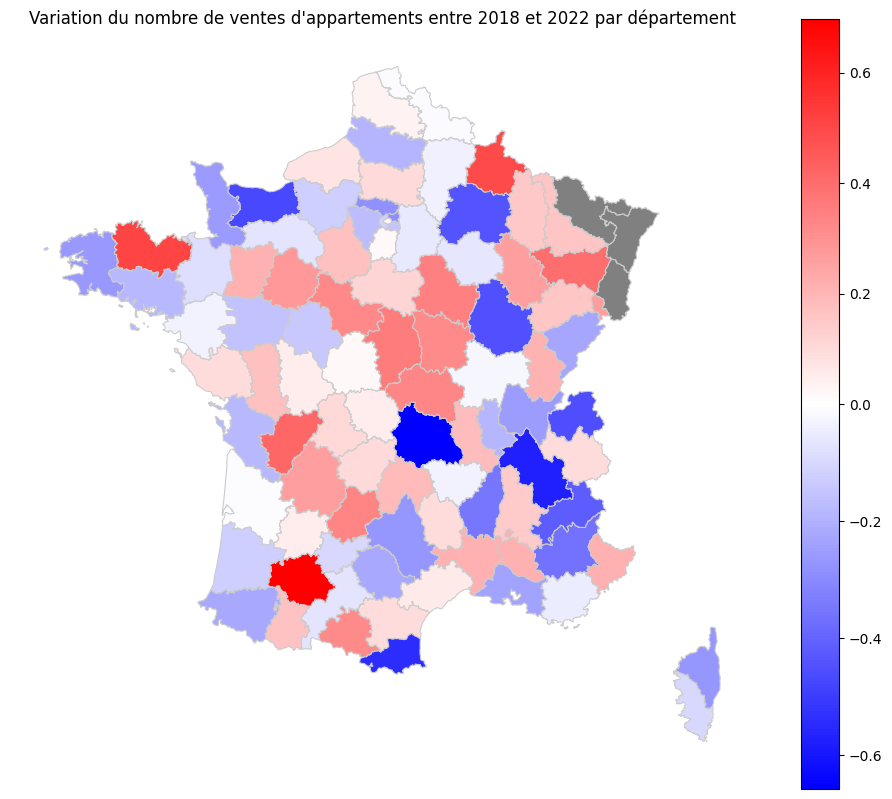

In [69]:

# Filtrer les données pour les maisons uniquement
table_valfonc_2018_Appartement = table_valfonc_2018[table_valfonc_2018['Type local'] == 'Appartement']
table_valfonc_2022_Appartement = table_valfonc[table_valfonc['Type local'] == 'Appartement']

# Compter le nombre de ventes de maisons par département pour 2018 et 2022
ventes_2018_Appartement = table_valfonc_2018_Appartement['Code departement'].value_counts().reset_index()
ventes_2022_Appartement = table_valfonc_2022_Appartement['Code departement'].value_counts().reset_index()

# Renommer les colonnes
ventes_2018_Appartement.columns = ['Departement', 'Ventes 2018']
ventes_2022_Appartement.columns = ['Departement', 'Ventes 2022']

# Fusionner les données
ventes_diff_Appartement = ventes_2022_Appartement.merge(ventes_2018_Appartement, on='Departement', how='left')

# Calculer le pourcentage de variation
ventes_diff_Appartement['Variation'] = (ventes_diff_Appartement['Ventes 2022'] - ventes_diff_Appartement['Ventes 2018']) / ventes_diff_Appartement['Ventes 2018']

# Charger le fichier GeoJSON des départements français
url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
departments = gpd.read_file(url)

# Fusionner les données géospatiales et les données sur la variation des ventes
departments = departments.merge(ventes_diff_Appartement, left_on='code', right_on='Departement', how='left')



# Définir les valeurs minimales et maximales de variation
min_variation = ventes_diff_Appartement['Variation'].min()
max_variation = ventes_diff_Appartement['Variation'].max()

# Définir la colormap personnalisée
cmap = mcolors.LinearSegmentedColormap.from_list('variation_cmap', ['#0000FF', '#FFFFFF', '#FF0000'])

# Définir les bornes de la variation pour la colormap
norm = mcolors.TwoSlopeNorm(vmin=min_variation, vcenter=0, vmax=max_variation)

# Créer la carte de la variation des ventes d'appartements
fig, ax = plt.subplots(1, figsize=(12, 10))
departments.plot(column='Variation', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm,missing_kwds={'color': 'grey'})
ax.axis('off')
ax.set_title("Variation du nombre de ventes d'appartements entre 2018 et 2022 par département")

plt.show()



Cette carte nous permet de voir que le nombre d'appartements vendu par départements a en moyenne baissé dans chaque départements. Les deux cartes nous montre donc bien que en moyenne les français voulaient plus grand (que ce soit leur domicile principale ou pour un domicile secondaire) après le Covid.